In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [133]:
#loading the data
data=pd.read_csv("train.csv")
df= pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")
test_id = df_test['id']
df_test = df_test.drop('id',axis=1)


In [134]:
data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [167]:
data.shape

(20758, 18)

In [168]:
data.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [137]:
categorical_columns = df.select_dtypes(include =['object'])
categorical_columns.columns

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [138]:
df['NObeyesdad'].unique()

array(['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight',
       'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I',
       'Obesity_Type_I'], dtype=object)

In [139]:
target_dictionary = {'Insufficient_Weight':'0',
                     'Normal_Weight':'1',
                     'Overweight_Level_I':'2',
                     'Overweight_Level_II':'3',
                     'Obesity_Type_I':'4',
                     'Obesity_Type_II':'5',
                     'Obesity_Type_III':'6'}


In [64]:
df['NObeyesdad'] = df['NObeyesdad'].replace(target_dictionary).astype('int64')
df['NObeyesdad'].unique()

array([3, 1, 0, 6, 5, 2, 4], dtype=int64)

In [65]:
df['MTRANS'].unique()

array(['Public_Transportation', 'Automobile', 'Walking', 'Motorbike',
       'Bike'], dtype=object)

In [67]:
target_dictionary = {'Bike':'0',
                     'Walking':'1',
                     'Motorbike':'2',
                     'Automobile':'3',
                     'Public_Transportation':'4',
                     }
df['MTRANS'] = df['MTRANS'].replace(target_dictionary).astype(int)
df['MTRANS'].unique()


array([4, 3, 1, 2, 0])

In [68]:
df['CAEC'].unique()

array(['Sometimes', 'Frequently', 'no', 'Always'], dtype=object)

In [71]:
target_dictionary = {'Frequently':'2',
                     'Always':'3',
                     'no':'0',
                     'Sometimes':'1',
                     }
df['CALC'] = df['CALC'].replace(target_dictionary).astype('int64')
df['CALC'].unique()

array([1, 0, 2], dtype=int64)

In [72]:
target_dictionary = {'Frequently':'2',
                     'Always':'3',
                     'no':'0',
                     'Sometimes':'1',
                     }
df['CAEC'] = df['CAEC'].replace(target_dictionary).astype(int)
df['CAEC'].unique()

array([1, 2, 0, 3])

In [7]:
data.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [8]:
#checking for duplicated value
duplicates = data.duplicated()
num_duplicates=duplicates.sum()
print("Number of duplicates rows:",num_duplicates)

Number of duplicates rows: 0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [85]:
df['NObeyesdad'].value_counts()

NObeyesdad
6.0    4046
5.0    3248
1.0    3082
4.0    2910
0.0    2523
3.0    2522
2.0    2427
Name: count, dtype: int64

In [79]:
df['BMI_Sqrt'] = ((df['Weight'])**0.5/(df['Height']**1))
df['BMI_Sqrt'].value_counts()

BMI_Sqrt
4.159452    191
5.261336    179
5.420771    148
5.094267    139
5.164568    122
           ... 
6.328291      1
5.715166      1
4.232225      1
6.643650      1
5.983323      1
Name: count, Length: 12609, dtype: int64

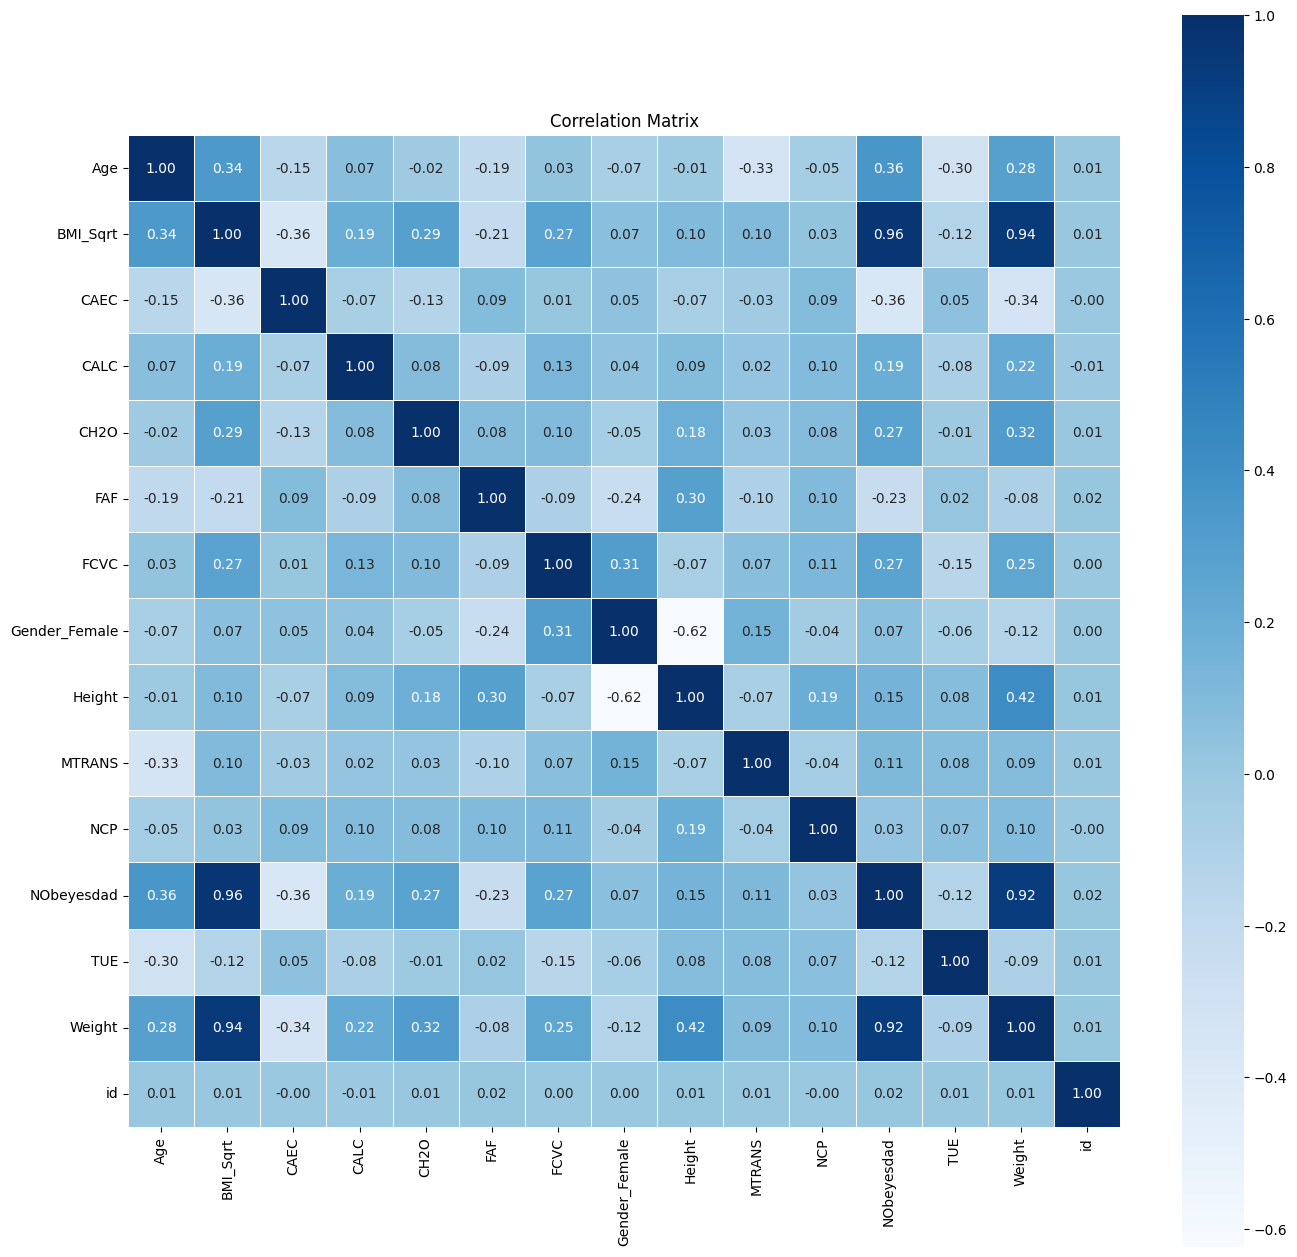

In [82]:
df = df.astype(float)
corr_matrix = df.corr()
sorted_correlation = corr_matrix['NObeyesdad'].sort_index(ascending=True)
correlated_columns = sorted_correlation.index
subset_corr_matrix = corr_matrix.loc[correlated_columns,correlated_columns]
plt.figure(figsize= (16,16))
sns.heatmap(subset_corr_matrix, annot=True, cmap='Blues',linewidths=0.5,fmt=".2f",square=True)
plt.title('Correlation Matrix')
plt.show()

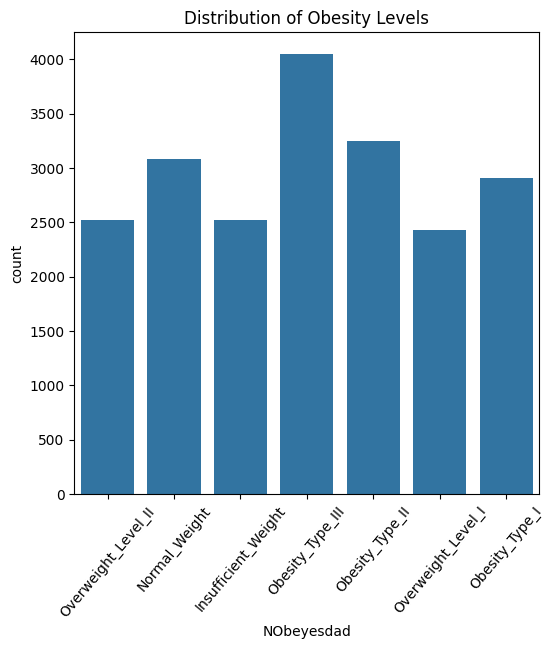

In [12]:
#visualizing the target variable
plt.figure(figsize=(6,6))
sns.countplot(x="NObeyesdad",data=data)
plt.title("Distribution of Obesity Levels")
plt.xticks(rotation=50)
plt.show()

In [88]:
#now encoding our target variable into numerical labels.
label_encoder=LabelEncoder()
data['NObeyesdad']=label_encoder.fit_transform(data['NObeyesdad'])
data['NObeyesdad']

0        6
1        1
2        0
3        4
4        6
        ..
20753    3
20754    0
20755    3
20756    6
20757    3
Name: NObeyesdad, Length: 20758, dtype: int32

In [89]:
data['NObeyesdad'].value_counts()

NObeyesdad
4    4046
3    3248
1    3082
2    2910
0    2523
6    2522
5    2427
Name: count, dtype: int64

In [129]:
#Split features and target variable
x=data.drop(columns="NObeyesdad")
y=data['NObeyesdad']


In [91]:
# Define categorical and numerical features
categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [92]:
# Split the data into training and validation sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [93]:
# Define preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [94]:
# Define the LGBM model 
#this is basically used for multi-class classification tasks.
lgbm_model = LGBMClassifier()

In [95]:
#define the pipeline
pipeline=Pipeline(steps=[('preprocessor',preprocessor),('classifier', lgbm_model)])

In [96]:
# Define hyperparameters for randomized search
param_grid = {
    'classifier__n_estimators': [100, 200, 300, 400, 500],
    'classifier__max_depth': [3, 5, 7, 9, 11],
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'classifier__subsample': [0.5, 0.7, 0.9, 1.0],
    'classifier__colsample_bytree': [0.5, 0.7, 0.9, 1.0],
    'classifier__min_child_samples': [10, 20, 30, 40, 50],
    'classifier__reg_alpha': [0.0, 0.1, 0.5, 1.0],
    'classifier__reg_lambda': [0.0, 0.1, 0.5, 1.0],
    'classifier__min_child_weight': [1e-3, 1e-2, 0.1, 1, 10]
}

In [97]:
# Perform randomized search cross-validation

random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, 
                                   n_iter=50, 
                                   cv=3, 
                                   verbose=2, 
                                   random_state=42, 
                                   n_jobs=-1)
random_search.fit(x_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001244 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2041
[LightGBM] [Info] Number of data points in the train set: 16606, number of used features: 30
[LightGBM] [Info] Start training from score -2.117117
[LightGBM] [Info] Start training from score -1.911230
[LightGBM] [Info] Start training from score -1.948141
[LightGBM] [Info] Start training from score -1.857720
[LightGBM] [Info] Start training from score -1.633574
[LightGBM] [Info] Start training from score -2.145531
[

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Age',
                                                                                'Height',
                                                                                'Weight',
                                                                                'FCVC',
                                                                                'NCP',
                                                                                'CH2O',
                                                                                'FAF',
                                                                                'TUE']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['Gender',
                                                                                'family_history_with_overweight',
                                                                                'FAVC',
                                                                                'CAEC',
                                                                                'SMOKE',...
                                                                      0.2,
                                                                      0.3],
                                        'classifier__max_depth': [3, 5, 7, 9,
                                                                  11],
                                        'classifier__min_child_samples': [10,
                                                                          20,
                                                                          30,
                                                                          40,
                                                                          50],
                                        'classifier__min_child_weight': [0.001,
                                                                         0.01,
                                                                         0.1, 1,
                                                                         10],
                                        'classifier__n_estimators': [100, 200,
                                                                     300, 400,
                                                                     500],
                                        'classifier__reg_alpha': [0.0, 0.1, 0.5,
                                                                  1.0],
                                        'classifier__reg_lambda': [0.0, 0.1,
                                                                   0.5, 1.0],
                                        'classifier__subsample': [0.5, 0.7, 0.9,
                                                                  1.0]},
                   random_state=42, verbose=2)

In [98]:
# Get the best parameters

best_params = random_search.best_params_
print(best_params)
best_model = random_search.best_estimator_ #model has been build after performing hyper parameter tuning and taking best parameters.

{'classifier__subsample': 0.7, 'classifier__reg_lambda': 1.0, 'classifier__reg_alpha': 1.0, 'classifier__n_estimators': 200, 'classifier__min_child_weight': 0.001, 'classifier__min_child_samples': 20, 'classifier__max_depth': 9, 'classifier__learning_rate': 0.05, 'classifier__colsample_bytree': 0.5}


In [171]:
# Evaluate the best model on the validation set
accuracy = best_model.score(x_test, y_test)
print("Validation Accuracy:", accuracy)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Validation Accuracy: 0.9494219653179191


In [107]:
# best model on entire dataset
best_model.fit(x,y)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002099 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2045
[LightGBM] [Info] Number of data points in the train set: 20758, number of used features: 30
[LightGBM] [Info] Start training from score -2.107483
[LightGBM] [Info] Start training from score -1.907353
[LightGBM] [Info] Start training from score -1.964779
[LightGBM] [Info] Start training from score -1.854892
[LightGBM] [Info] Start training from score -1.635203
[LightGBM] [Info] Start training from score -2.146276
[LightGBM] [Info] Start training from score -2.107879
[LightGBM

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Height', 'Weight',
                                                   'FCVC', 'NCP', 'CH2O', 'FAF',
                                                   'TUE']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'CAEC', 'SMOKE',
                                                   'SCC', 'CALC',
                                                   'MTRANS'])])),
                ('classifier',
                 LGBMClassifier(colsample_bytree=0.5, learning_rate=0.05,
                                max_depth=9, n_estimators=200, reg_alpha=1.0,
                                reg_lambda=1.0, subsample=0.7))])

In [172]:

# Predict the obesity levels for the testing dataset
y_pred = best_model.predict(x_test)
# Compute the classification report and the accuracy
print(classification_report(y_pred, y_test))
print("The accuracy for the ML model is {} %".format(round(100 * accuracy_score(y_pred, y_test))))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       527
           1       0.93      0.93      0.93       628
           2       0.94      0.94      0.94       538
           3       0.99      0.99      0.99       657
           4       1.00      1.00      1.00       805
           5       0.87      0.88      0.87       478
           6       0.91      0.90      0.90       519

    accuracy                           0.95      4152
   macro avg       0.94      0.94      0.94      4152
weighted avg       0.95      0.95      0.95      4152

The accuracy for the ML model is 95 %


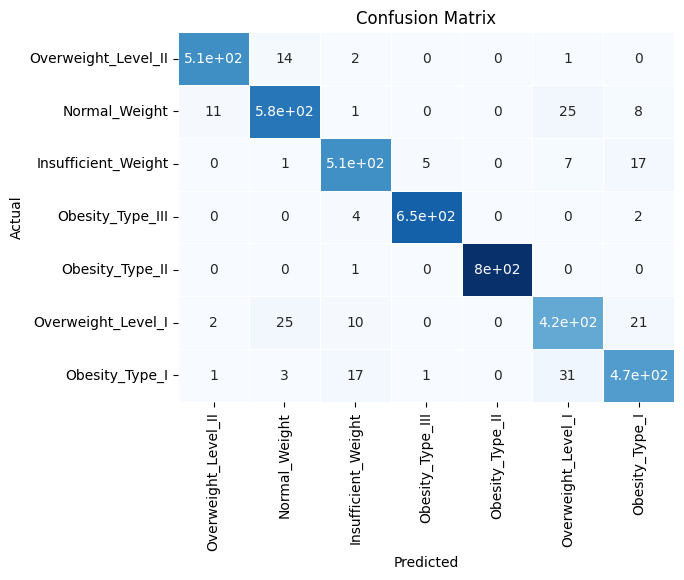

In [118]:
labels = ['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight',
'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I',
'Obesity_Type_I']


# Create heatmap for the confusion matrix
sns.heatmap(pd.DataFrame(confusion_matrix(y_pred, y_test)), annot=True, annot_kws = {'size' :10}, linewidths= 0.5, cmap = 'Blues', cbar=False, xticklabels = labels, yticklabels = labels)

# Add title
plt.title('Confusion Matrix')

# Add labels
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Show the plot
plt.show()

In [153]:
from sklearn.model_selection import cross_val_score
import joblib

# Load the label encoder for the target variable
label_encoder = LabelEncoder()
label_encoder.classes_ = pd.read_pickle('label_encoder')

# Load the saved model
best_model = joblib.load('trained_model')

# Perform cross-validation
scores = cross_val_score(best_model, x, y, cv=5)

# Compute the mean and standard deviation of the scores
mean_score = scores.mean()
std_score = scores.std()

# Print the mean and standard deviation of the scores
print('Mean score:', mean_score)
print('Standard deviation:', std_score)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001339 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2043
[LightGBM] [Info] Number of data points in the train set: 16606, number of used features: 30
[LightGBM] [Info] Start training from score -2.107657
[LightGBM] [Info] Start training from score -1.907167
[LightGBM] [Info] Start training from score -1.964755
[LightGBM] [Info] Start training from score -1.855022
[LightGBM] [Info] Start training from score -1.635117
[LightGBM] [Info] Start training from score -2.146046
[LightGBM] [Info] Start training from score -2.108153
[LightGBM

In [159]:
#model deployment
import joblib

In [160]:
joblib.dump(best_model,'trained_model') #main model

['trained_model']

In [161]:
loaded_model = joblib.load('trained_model')

In [162]:
LGBM_y_pred = loaded_model.predict(x_test)
LGBM_y_pred

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


array([4, 5, 2, ..., 2, 5, 6])

In [163]:
import uuid
model_results = pd.DataFrame({'id' : uuid.uuid4(),'NObeyesdad':LGBM_y_pred})

In [164]:
target_dictionary = {
0:'Insufficient_Weight',
1: 'Normal_Weight',
2: 'Overweight_Level_I',
3: 'Overweight_Level_II',
4: 'Obesity_Type_I',
5: 'Obesity_Type_II',
6: 'Obesity_Type_III'
}

# Replace the numeric labels with the text labels
model_results['NObeyesdad'] = model_results['NObeyesdad'].replace(target_dictionary)

In [165]:
model_results[['id', 'NObeyesdad']].to_csv('submission.csv', index=False)

In [166]:
joblib.dump(label_encoder,'label_encoder') #encoder model

['label_encoder']

In [3]:
import tkinter as tk
from tkinter import ttk
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import joblib

# Load the label encoder for the target variable
label_encoder = LabelEncoder()
label_encoder.classes_ = pd.read_pickle('label_encoder')

# Load the saved model
best_model = joblib.load('trained_model')

def predict_obesity():
    # Get user input
    gender = gender_var.get()
    age = float(age_entry.get())
    height = float(height_entry.get())
    weight = float(weight_entry.get())
    family_history = family_history_var.get()
    favc = favc_var.get()
    fcvc = float(fcvc_entry.get())
    ncp = float(ncp_entry.get())
    caec = caec_var.get()
    smoke = smoke_var.get()
    ch2o = float(ch2o_entry.get())
    scc = scc_var.get()
    faf = float(faf_entry.get())
    tue = float(tue_entry.get())
    calc = calc_var.get()
    mtrans = mtrans_var.get()

    # Prepare input data
    data = pd.DataFrame({
        'Gender': [gender],
        'Age': [age],
        'Height': [height],
        'Weight': [weight],
        'family_history_with_overweight': [family_history],
        'FAVC': [favc],
        'FCVC': [fcvc],
        'NCP': [ncp],
        'CAEC': [caec],
        'SMOKE': [smoke],
        'CH2O': [ch2o],
        'SCC': [scc],
        'FAF': [faf],
        'TUE': [tue],
        'CALC': [calc],
        'MTRANS': [mtrans]
    })

    # Make prediction using the loaded model
    prediction = best_model.predict(data)
    result_label.config(text="Predicted obesity level: {}".format(label_encoder.inverse_transform(prediction)[0]))

# Create GUI
root = tk.Tk()
root.title("Obesity Prediction")

mainframe = ttk.Frame(root, padding="20")
mainframe.grid(column=0, row=0, sticky=(tk.N, tk.W, tk.E, tk.S))
mainframe.columnconfigure(0, weight=1)
mainframe.rowconfigure(0, weight=1)

style = ttk.Style()
style.theme_use('clam')
style.configure('TLabel', font=('Helvetica', 12, 'bold'), bg='lightblue')
style.configure('TCombobox', font=('Helvetica', 12))

# Create input fields for numerical columns
ttk.Label(mainframe, text="Gender:").grid(column=1, row=1, sticky=tk.W, pady=(0, 10))
gender_var = tk.StringVar()
gender_combobox = ttk.Combobox(mainframe, width=15, textvariable=gender_var, values=['Male', 'Female'])
gender_combobox.grid(column=2, row=1, sticky=tk.W, pady=(0, 10))

ttk.Label(mainframe, text="Age:").grid(column=1, row=2, sticky=tk.W, pady=(0, 10))
age_entry = ttk.Entry(mainframe, width=15)
age_entry.grid(column=2, row=2, sticky=tk.W, pady=(0, 10))

ttk.Label(mainframe, text="Height:").grid(column=1, row=3, sticky=tk.W, pady=(0, 10))
height_entry = ttk.Entry(mainframe, width=15)
height_entry.grid(column=2, row=3, sticky=tk.W, pady=(0, 10))

ttk.Label(mainframe, text="Weight:").grid(column=1, row=4, sticky=tk.W, pady=(0, 10))
weight_entry = ttk.Entry(mainframe, width=15)
weight_entry.grid(column=2, row=4, sticky=tk.W, pady=(0, 10))

ttk.Label(mainframe, text="family_history_with_overweight:").grid(column=1, row=5, sticky=tk.W, pady=(0, 10))
family_history_var = tk.StringVar()
family_history_combobox = ttk.Combobox(mainframe, width=15, textvariable=family_history_var, values=['yes', 'no'])
family_history_combobox.grid(column=2, row=5, sticky=tk.W, pady=(0, 10))
ttk.Label(mainframe, text="FAVC:").grid(column=1, row=6, sticky=tk.W, pady=(0, 10))
favc_var = tk.StringVar()
favc_combobox = ttk.Combobox(mainframe, width=15, textvariable=favc_var, values=['yes', 'no'])
favc_combobox.grid(column=2, row=6, sticky=tk.W,padx=(10, 0), pady=(0, 10))


ttk.Label(mainframe, text="FCVC:", font=('Helvetica', 12, 'bold')).grid(column=1, row=7, sticky=tk.W, padx=(10, 0), pady=(0, 10))
fcvc_entry = ttk.Entry(mainframe, width=15)
fcvc_entry.grid(column=2, row=7, sticky=tk.W, padx=(10, 0), pady=(0, 10))

ttk.Label(mainframe, text="NCP:", font=('Helvetica', 12, 'bold')).grid(column=1, row=8, sticky=tk.W, padx=(10, 0), pady=(0, 10))
ncp_entry = ttk.Entry(mainframe, width=15)
ncp_entry.grid(column=2, row=8, sticky=tk.W, padx=(10, 0), pady=(0, 10))

ttk.Label(mainframe, text="CAEC:", font=('Helvetica', 12, 'bold')).grid(column=1, row=9, sticky=tk.W, padx=(10, 0), pady=(0, 10))
caec_var = tk.StringVar()
caec_combobox = ttk.Combobox(mainframe, width=15, textvariable=caec_var, values=['no', 'Sometimes', 'Frequently', 'Always'])
caec_combobox.grid(column=2, row=9, sticky=tk.W, padx=(10, 0), pady=(0, 10))

ttk.Label(mainframe, text="Smoke:", font=('Helvetica', 12, 'bold')).grid(column=1, row=10, sticky=tk.W, padx=(10, 0), pady=(0, 10))
smoke_var = tk.StringVar()
smoke_combobox = ttk.Combobox(mainframe, width=15, textvariable=smoke_var, values=['no', 'yes'])
smoke_combobox.grid(column=2, row=10, sticky=tk.W, padx=(10, 0), pady=(0, 10))

ttk.Label(mainframe, text="CH2O:", font=('Helvetica', 12, 'bold')).grid(column=1, row=11, sticky=tk.W, padx=(10, 0), pady=(0, 10))
ch2o_entry = ttk.Entry(mainframe, width=15)
ch2o_entry.grid(column=2, row=11, sticky=tk.W, padx=(10, 0), pady=(0, 10))

ttk.Label(mainframe, text="SCC:", font=('Helvetica', 12, 'bold')).grid(column=1, row=12, sticky=tk.W, padx=(10, 0), pady=(0, 10))
scc_var = tk.StringVar()
scc_combobox = ttk.Combobox(mainframe, width=15, textvariable=scc_var, values=['no', 'yes'])
scc_combobox.grid(column=2, row=12, sticky=tk.W, padx=(10, 0), pady=(0, 10))

ttk.Label(mainframe, text="FAF:", font=('Helvetica', 12, 'bold')).grid(column=1, row=13, sticky=tk.W, padx=(10, 0), pady=(0, 10))
faf_entry = ttk.Entry(mainframe, width=15)
faf_entry.grid(column=2, row=13, sticky=tk.W, padx=(10, 0), pady=(0, 10))

ttk.Label(mainframe, text="TUE:", font=('Helvetica', 12, 'bold')).grid(column=1, row=14, sticky=tk.W, padx=(10, 0), pady=(0, 10))
tue_entry = ttk.Entry(mainframe, width=15)
tue_entry.grid(column=2, row=14, sticky=tk.W, padx=(10, 0), pady=(0, 10))

ttk.Label(mainframe, text="CALC:", font=('Helvetica', 12, 'bold')).grid(column=1, row=15, sticky=tk.W, padx=(10, 0), pady=(0, 10))
calc_var = tk.StringVar()
calc_combobox = ttk.Combobox(mainframe, width=15, textvariable=calc_var, values=['no', 'Sometimes', 'Frequently', 'Always'])
calc_combobox.grid(column=2, row=15, sticky=tk.W, padx=(10, 0), pady=(0, 10))

ttk.Label(mainframe, text="MTRANS:", font=('Helvetica', 12, 'bold')).grid(column=1, row=16, sticky=tk.W, padx=(10, 0), pady=(0, 10))
mtrans_var = tk.StringVar()
mtrans_combobox = ttk.Combobox(mainframe, width=15, textvariable=mtrans_var, values=['Automobile', 'Bike', 'Motorbike', 'Public_Transportation', 'Walking'])
mtrans_combobox.grid(column=2, row=16, sticky=tk.W, padx=(10, 0), pady=(0, 10))

# Add a button to make prediction
ttk.Button(mainframe, text="Predict", command=predict_obesity).grid(column=2, row=17, sticky=tk.W, padx=(10, 0), pady=(0, 10))

# Add label to display result
result_label = ttk.Label(mainframe, text="")
result_label.grid(column=1, row=18, columnspan=2, sticky=tk.W, padx=(10, 0), pady=(0, 10))

root.mainloop()





[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
